# Differentail Equation

根据导数关系找出函数

## slope field 绘图
### computer graph
1) pick point f(x,y) 等距离  
2) 计算出每一个 f(x,y)  
3) 绘制出每一个 f(x,y) 的线素  

### human
1) pick slope c  
2) $f(x,y) = c$  
3) 绘制出线素  

## 欧拉数值法 
### IVP(initial value problem)
$$ y' = f(x, y) $$
$$ y(x_{0}) = y_{0} $$


### 陷阱
- 非连续函数(存在奇点） $y' = y^2$

## 分离变量法

## first-order linear(一阶线性)
### method
- 标准线性方程 $y' + py = q$
- calc integrate factor of $u = e^{\int pdx}$
- multiply both side
- integrate


## 一阶方程换元法
### basic linear ODE
$$ y' + ky = kq(t) $$
$$ y' + ky = q(t) $$
$$ y' + p(t)y = q(t) $$

### direct 直接代换  $T1 = T/M$
伯努利方程

### inverse 反向代换 $T = MT1$

## homogeneous ODE's
$$ y' = F(y/x) $$
$$ y' = x^2y/x^3+y^3 = \frac{y/x}{1 + (y/x)^3} $$

## autonomous 一阶自治ODE

## complex 复数应用

### argument 幅角
[Wiki](https://zh.wikipedia.org/wiki/%E5%B9%85%E8%A7%92)

### argument 倒数
设 x 为复数:
$$ 1/x * x = 1 $$
$$ |1/x| = 1/|x| $$
$$ arg(1/x) + arg(x) = 0 $$
$$ arg(1/x) = - arg(x) $$

## 二阶常数线性方程
$$ y'' + Ay' + By = 0 $$
### basic method
try $y=e^{rt}$  
- 实数且 r1 != r2， $y=C_{1}e^{r_{1}t} + C_{2}e^{r_{2}t}$  
- 复数

## 二阶线性齐次方程
$$ y'' + p(x)y' + q(x)y = 0 $$
利用微分算子:
$$ D^2(y) + pD(y) + qy = 0 $$
$$ (D^2 + pD + q)y = 0 $$
let $L = (D^2 + pD + q)$
$$ Ly = 0 $$
L 是一个微分算子

## 线性组合唯一解
http://localhost:8888/?token=61d814f4f46202c301f1d5ae0b5f2356f5c69c805b910a7c

### normalize solution 正交化


### IVP（初值问题）有且只有一个解

### exponential shift theorem
[wiki](https://en.wikipedia.org/wiki/Shift_theorem)

## 线性非齐次方程
一阶：
$$ y' + ky = q(t) $$
二阶：
$$ y'' + Ay' + By = f(t) $$
$$ y = y_{p} + C_{1}y_{1} + C_{2}y_{2} $$
$$ (D^2 + AD + B)y = f(x) $$
$$ p(D) = (D^2 + AD + B) $$

代换法则：
$$ p(D)e^{ax} = p(a)e^{ax} $$

### 暂态与顺态

## 共振
$$ y'' + w^2_{0}y = cosw_{1}t $$
- $w_{0} != w_{1} $  
- $w_{0} = w_{1} $

## 函数正交
[wiko](http://tutorial.math.lamar.edu/Classes/DE/PeriodicOrthogonal.aspx)  
正交函数且堆成函数只会有0

## Fourier Sine Series
$$
f ( x ) = \sum _ { n = 1} ^ { \infty } B _ { n } \sin \left( \frac { n \pi x } { L } \right)
$$
$$
B _ { n } = \frac { 2} { L } \int _ { 0} ^ { L } f ( x ) \sin \left( \frac { n \pi x } { L } \right) d x \quad n = 1,2,3
$$

### 与泰勒级数对比
泰勒尝试在点接近，傅立叶尝试范围接近


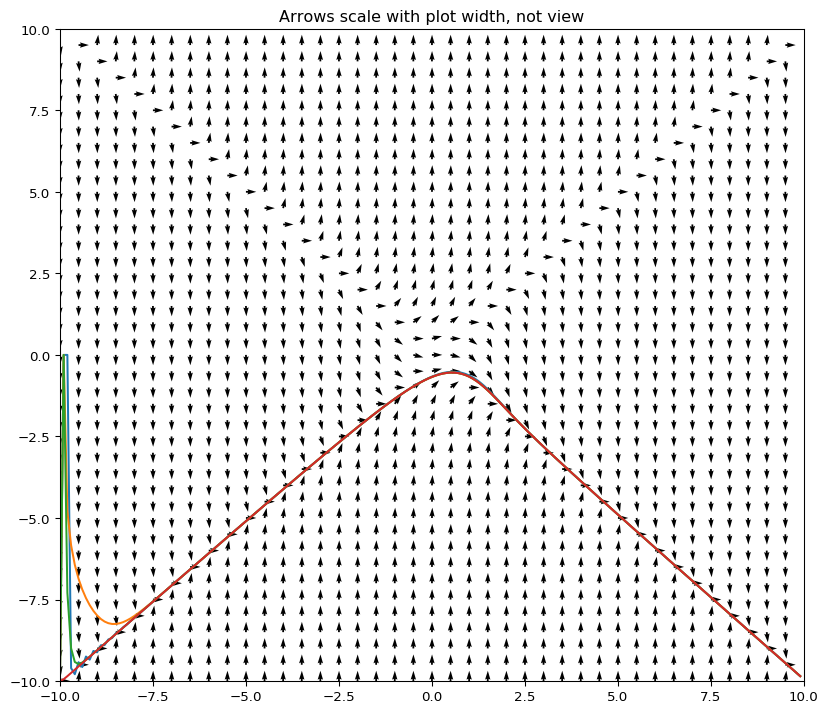

In [3]:
# 欧拉方法
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

X, Y = np.meshgrid(np.arange(-10, 10, .5), np.arange(-10, 10, .5))
U = 1
V = Y**2 - X**2 # df 

N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N

plt.figure(figsize=(10, 9), dpi= 96)
plt.title('Arrows scale with plot width, not view')
Q = plt.quiver(X, Y, U2, V2, units='width')
# qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

# euler first order method
def euler(df, y0, t):
    Y = np.zeros(t.size)
    Y[0] = y0
    slope = df(y0, t[0])
    for n in range(1, t.size - 1):
        Y[n+1] = Y[n] + slope*(t[n + 1] - t[n])
        slope = df(Y[n+1], t[n+1])
        
    return Y
# RK2
def euler2(df, y0, t):
    Y = np.zeros(t.size)
    Y[0] = y0
    slope = df(y0, t[0])
    for n in range(1, t.size - 1):
        tmpY = Y[n] + (slope)*(t[n + 1] - t[n])
        tmpSlope = df(tmpY, t[n+1])
        Y[n+1] = Y[n] + ((tmpSlope + slope)/2) * (t[n+1]-t[n])
        slope = df(Y[n+1], t[n+1])
        
    return Y

# RK4
def euler4(df, y0, t):
    Y = np.zeros(t.size)
    Y[0] = y0
    for n in range(1, t.size - 1):
        k1 = df(Y[n], t[n])
        k2 = df(Y[n] + k1*(0.5*(t[n+1]- t[n])), t[n] + 0.5*(t[n+1]- t[n]))
        k3 = df(Y[n] + k2*(0.5*(t[n+1]- t[n])), t[n] + 0.5*(t[n+1]- t[n]))
        k4 = df(Y[n] + k3*(t[n+1] - t[n]), t[n+1])
        Y[n+1] = Y[n] + ((1/6)*(k1 + 2*k2 + 2*k3 + k4)) * (t[n+1]-t[n])
        
    return Y

T = np.arange(-10, 10, .1)
df = lambda y, t: y**2 - t**2
df_initY = -10
# print(list(zip(T, euler(lambda y, t: t - 2*y, -10, T))))
plt.plot(T, euler(df, df_initY, T))
plt.plot(T, euler2(df, df_initY, T))
plt.plot(T, euler4(df, df_initY, T))
plt.plot(T, odeint(df, df_initY, T))


plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()

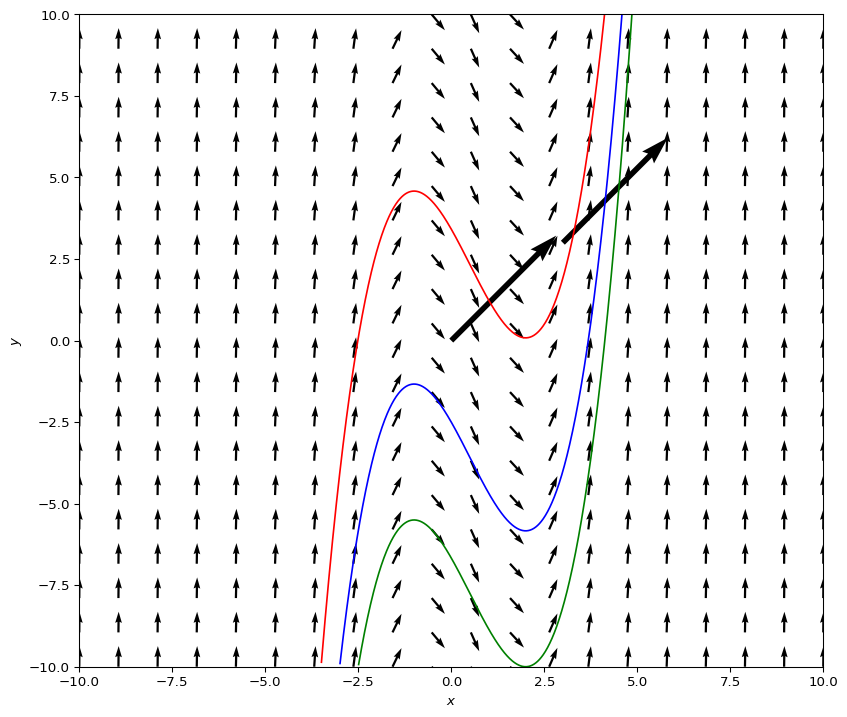

In [3]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(figsize=(10, 9), dpi= 96)
ax=fig.add_subplot(111)

## Vector field function
def vf(t,x):
  dx=np.zeros(2)
  dx[0]=1
  dx[1]=x[0]**2-x[0]-2
  return dx

#Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)
ic=[[-3.5,-10], [-3,-10], [-2.5,-10]]
color=['r','b','g']
for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 1.25)

#Vector field
X,Y = np.meshgrid( np.linspace(-10,10,20),np.linspace(-10,10,20) )
U = 1
V = X**2-X-2
#Normalize arrows
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2, )
ax.quiver( [0, 3], [0, 3], [3, 3], [3, 3], scale=1, units='xy')

# plt.axis('equal')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

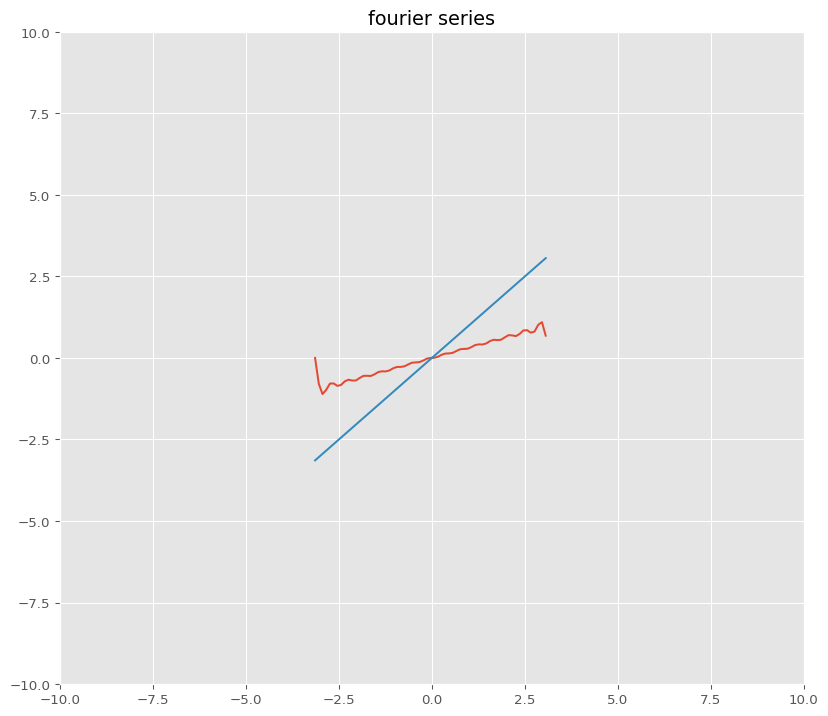

In [33]:
# 傅立叶
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np

plt.figure(figsize=(10, 9), dpi= 96)
plt.title('fourier series')
plt.xlim([-10,10])
plt.ylim([-10,10])


def f(x):
    return x

def bn(n):
    return 

def fs(x, n, L):
#     bn = reduce(lambda acc, i: acc + (-1)**(i+1) * np.sin(n*np.pi*x) / n, range(1, n))
    bn = 0
    for i in range(1, n):
        bn = bn + (-1)**(i+1) * np.sin(n*np.pi*x) / n
#     print(bn, bn.shape, x.shape)
    return 2*L/np.pi * bn

def fss(x, n):
#     print(*range(1, n))
    bn = reduce(lambda acc, i: acc + (-1)**(i+1) * np.sin(i*x)/i, range(2, n), (-1)**(1+1) * np.sin(x)/1)
    return 2/np.pi * bn

T = np.arange(-np.pi, np.pi, .1)
# T.shape()
# plt.plot(T, fs(T, 2, 6))
plt.plot(T, fss(T, 15))
plt.plot(T, f(T))





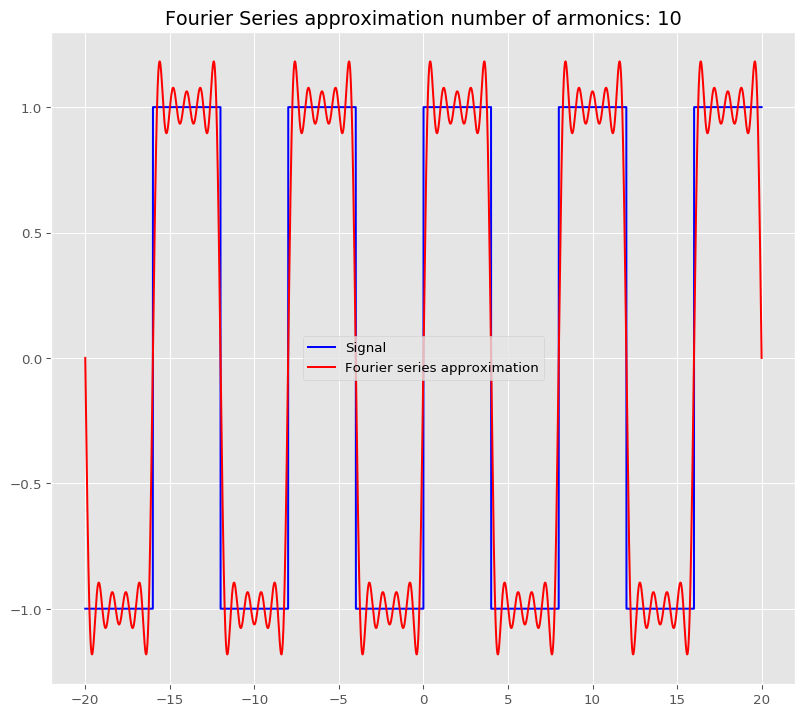

In [2]:
## import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(10, 9), dpi= 96)


# Setup
x_ = np.linspace(-20,20,10000)

T = 8
armonics = 10

def squareWave(x):
    global T
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = -1

    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1

# Bn coefficients
def bn(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0

# Wn
def wn(n):
    global T
    wn = (2*np.pi*n)/T
    return wn

# Fourier Series function
def fourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + bn(n)*np.sin(wn(n)*x)
        except:
            print("pass")
            pass
    return partialSums


y = []
f = []
for i in x_:
    y.append(squareWave(i))
    f.append(fourierSeries(armonics,i))


plt.plot(x_,y,color="blue",label="Signal")
plt.plot(x_,f,color="red",label="Fourier series approximation")
plt.title("Fourier Series approximation number of armonics: "+str(armonics))
plt.legend()
plt.show()


# Recitaltion
## 01
### Intro
某非洲政府尝试提出一个好的对策关于羚羊猎杀。他们使用如下模型：羚羊种群存在一个自然增长率`k`,假设一个猎杀羚羊率为 `a/年`

### Task
1) 写出羚羊种群数的模型。
2) 假设 `a = 0`，求物种数量翻倍的时间`T`
3) 找出这个方程
4) 找出满足这个方程的 ODE
5) 存在一个 `steady state`，找到它。
6) 画出这个 `steady state` 函数
